| Project name   |  Lidar With two Servo-motor |
|:----------|:-------------|
| **Autor(S)**| Andrés García,30451<br>Angel Ferrel 30447, <br> Brandon Martínez, 29242 <br> Zaid Moroyoqui, 34809|
| **Last update** | November 30 |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **<span style="color:blue">Problem statement</span>**

Object recognition is a very frequent problem nowadays, and there are many ways to work around this problem or topic, for example you could try to classify coins based on their size, geometry or even their weight. For certain systems such as simple vending machines this is an easy approach. However for many other problems such as recognizing larger objects, people may go for another approach like image recognition.

Very often “image recognition” will prove to be a demanding task and our problem is to find a  way to do the same using only the shape of an object. Since an image is essentially a very large matrix the approach would be to use the same idea of having a matrix as an input but with less information.
Here comes the development of a lidar system that allows us to get our data. This implies the usage of a VL53L0/1XV2 ToF ranging sensor that emits a laser pulse and measures the time it takes to bounce and come back; this enables us to measure distances up to two or four meters depending on the sensor. The sensor only works at a point so we would need to add two motors in order to create a lidar. Those servomotors would give us two liberty degrees that will move the sensor and scan the area of interest by taking multiple measurements of an object. The data collected on this process would be either an array if we only move in the ‘x’ axis or a matrix if we add the ‘y axis.

With the data that can be collected we can either design a mapping system of the scanned object or use many samples to create a supervised machine learning model that classifies objects. Those objects should be within the range of the sensor starting at 1mm and up to 2000mm, but the exact classification will be discussed later on. Our initial goal is to recognize biomass such as plants or shrubs (trees are very big to implement them).


### **<span style="color:blue">Objectives</span>**
* Enable the VL53L0/1XV2 sensor on the STM32F767ZI
* Implement one degree of freedom
* Implement two degrees of freedom
* Map the servo motors to perform a scan.
* Take multiple measurements in the scan to create a matrix.
* Collect multiple samples
* Train a Machine Learning model with the data to classify objects
* Test the model


### <span style="color:blue">Hardware requirements</span>


|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|STM32 F767ZI|1| Development board|<img src="https://www.st.com/bin/ecommerce/api/image.PF263516.en.feature-description-include-personalized-no-cpn-medium.jpg" alt="SIPO" width="150" eight="150">|
|VL53L0/1XV2 ToF Sensor |1| Light sensor with a 0mm-2000mm measurement range |<img src="https://www.flyrobo.in/image/cache/wp/gj/time-flight-vl53l0-1xv2-laser-ranging-sensor-tof/time-flight-vl53l0-1xv2-laser-ranging-sensor-tof1-1100x1100w.webp" alt="SIPO" width="150" eight="150">|
|Servomotor| 2| Enables the sensor to adquire moving degrees of freedom|<img src="https://www.steren.com.gt/media/catalog/product/cache/b69086f136192bea7a4d681a8eaf533d/image/196048a1b/micro-servomotor-con-torque-de-1-8-kgf-cm.jpg" alt="PISO" width="200" height="200">|
|Breadboard| 1| For managing circuits|<img src="https://probots.co.in/pub/media/catalog/product/cache/d8ddd0f9b0cd008b57085cd218b48832/d/o/doat-solderless-breadboard.jpg" alt="PISO" width="200" height="200">|


### **<span style="color:blue">Hardware schematic</span>**

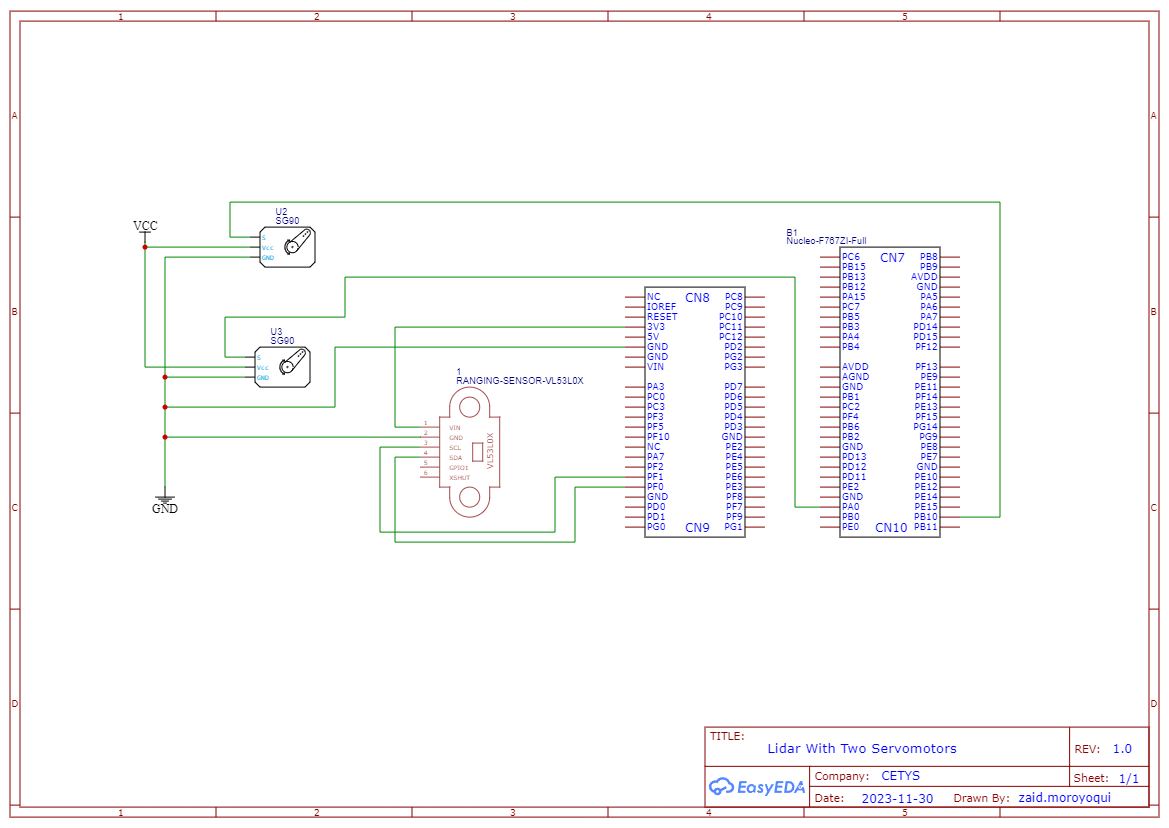

### <span style="color:blue">Hardware layout</span>

| | |
|:--:|:--:|
|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/hardware.jpg" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/proto.jpg" alt="Connection to board"/>|
|Installed hardware | Hardware to protoboard. Pin GND for ground.|
|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/ToF.jpg" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/servos.jpg" alt="Connection to board"/>|
|ToF to STM32. Pin 3v3, GND, PF0 & PF1 connection |Timers for servos. Pin PA0 & PB10 connection.|
|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/serial.jpg" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="https://brami05.github.io/Graficas-y-visualizacion/full.jpg" alt="Connection to board"/>|
|Send serial data from STM32|Full connection to board|


### <span style="color:blue">CubeMX parameters</span>


The following table summarizes the project settings. To configure TIM2 to operate at 1 Hz APB1 timer clocks was set to operate at 16Mhz, TIM2 settings include:
- Prescaler (PSC) to 16-1
- Counter period (16 bit AutoReload Register, ARR) to 20000-1.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <caption>Table III. Solution 1 specification</caption>
  <tr>
    <th class="tg-fymr" colspan="2">Class</th>
    <th class="tg-fymr" colspan="2">Attribute</th>
    <th class="tg-fymr" colspan="3">Value</th>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>Project</b></td>
    <td class="tg-c3ow" colspan="2">Name</td>
    <td class="tg-c3ow" colspan="3">F767ZI_Lidar</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Clock</td>
    <td class="tg-c3ow" colspan="3">16Mhz</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Timebase source</td>
    <td class="tg-c3ow" colspan="3">TIM2</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>STM32 Pins</b></td>
      <td class="tg-c3ow" colspan="2"><span style="color:red">PF0, PF1, PA0, PB10</span></td>
    <td class="tg-c3ow" colspan="3"><span style="color:red">PF0 at I2C2 SDA,<br>PF1 at I2C2 SDL, <br>PA0 at TIM2_CH1, <br> PB10 at TIM2_CH3.</span></td>
  </tr>
</table>

**Note**, Remember to enable TIM2 and I2C2 to I2C.


### <span style="color:blue">Software components</span>

For the VL53L0x we used the API provided by ST but added some modifications because the API works on windows and we are not working with Windows, we also had to modify it so it works on the STM32F7 so it may not work on other modules. For it to work on alternate MCU you have to modify the includes in the vl53l0x_platform.c and .h. We provide the Drivers in the link below:
[Lidar API](https://drive.google.com/file/d/1EgZafmb9UGTow-9uzjy_Evzk8EcbacE5/view?usp=sharing)

Other important steps are including the inc folders in the properties of the project.
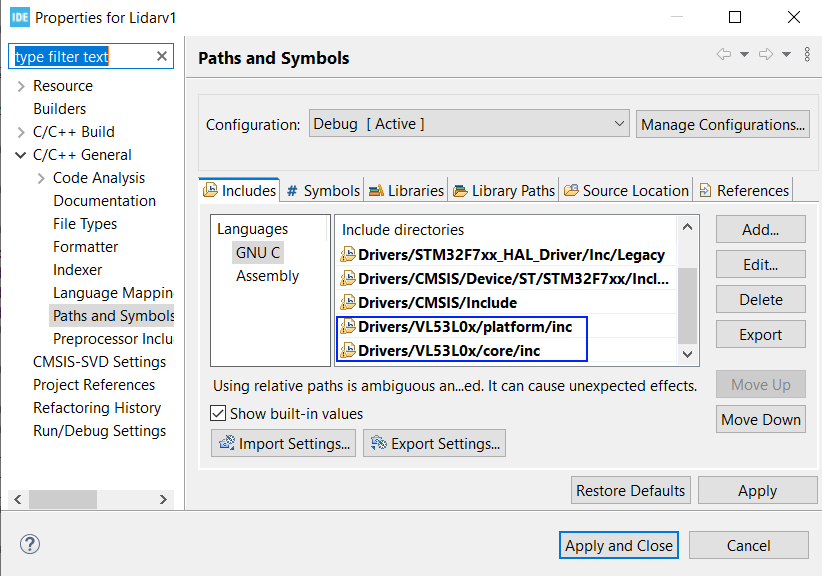

# **VL53L0x Initialization**
Shows a simple code for initialization of the VL53L0x, you can see a code using USART in the while, which is not specified in the CubeMX parameters, it's just there to show an example of how to get the measurement.

In [ ]:
#include "vl53l0x_api.h"

/* USER CODE BEGIN 0 */
VL53L0X_RangingMeasurementData_t RangingData;
VL53L0X_Dev_t  vl53l0x_c;
VL53L0X_DEV    Dev = &vl53l0x_c;
/* USER CODE END 0 */

int main(){
  /* USER CODE BEGIN 1 */
	uint8_t Message[100];
	uint32_t MessageLen;
	uint32_t refSpadCount;
	uint8_t isApertureSpads;
	uint8_t VhvSettings;
	uint8_t PhaseCal;
  /* USER CODE END 1 */

  /* USER CODE BEGIN 2 */
  Dev->I2cHandle = &hi2c2;
  Dev->I2cDevAddr = 0x52;
'''
  This may be skipped as it only enables or disables the sensor.
  HAL_GPIO_WritePin(TOF_XSHUT_GPIO_Port, TOF_XSHUT_Pin, GPIO_PIN_RESET); // Disable XSHUT
  HAL_Delay(20);
  HAL_GPIO_WritePin(TOF_XSHUT_GPIO_Port, TOF_XSHUT_Pin, GPIO_PIN_SET); // Enable XSHUT
  HAL_Delay(20);
'''
  //
  // VL53L0X init for Single Measurement
  //

  VL53L0X_WaitDeviceBooted( Dev );
  VL53L0X_DataInit( Dev );
  VL53L0X_StaticInit( Dev );
  VL53L0X_PerformRefCalibration(Dev, &VhvSettings, &PhaseCal);
  VL53L0X_PerformRefSpadManagement(Dev, &refSpadCount, &isApertureSpads);
  VL53L0X_SetDeviceMode(Dev, VL53L0X_DEVICEMODE_SINGLE_RANGING);

  // Enable/Disable Sigma and Signal check
  VL53L0X_SetLimitCheckEnable(Dev, VL53L0X_CHECKENABLE_SIGMA_FINAL_RANGE, 1);
  VL53L0X_SetLimitCheckEnable(Dev, VL53L0X_CHECKENABLE_SIGNAL_RATE_FINAL_RANGE, 1);
  VL53L0X_SetLimitCheckValue(Dev, VL53L0X_CHECKENABLE_SIGNAL_RATE_FINAL_RANGE, (FixPoint1616_t)(0.1*65536));
  VL53L0X_SetLimitCheckValue(Dev, VL53L0X_CHECKENABLE_SIGMA_FINAL_RANGE, (FixPoint1616_t)(60*65536));
  VL53L0X_SetMeasurementTimingBudgetMicroSeconds(Dev, 33000);
  VL53L0X_SetVcselPulsePeriod(Dev, VL53L0X_VCSEL_PERIOD_PRE_RANGE, 18);
  VL53L0X_SetVcselPulsePeriod(Dev, VL53L0X_VCSEL_PERIOD_FINAL_RANGE, 14);
  /* USER CODE END 2 */

  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {
	  VL53L0X_PerformSingleRangingMeasurement(Dev, &RangingData);

	  if(RangingData.RangeStatus == 0)
	  {
		  MessageLen = sprintf((char*)Message, "Measured distance: %i\n\r", RangingData.RangeMilliMeter);
		  HAL_UART_Transmit(&huart3, Message, MessageLen, 100);
		  HAL_Delay(1000);
	  }
    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */
  }
  /* USER CODE END 3 */
}

# **Two Servomotor handling via PWM**
Values for the servomotor are deprecated to 1ms and 2ms.

CCR1 to 1000 means a 1ms duty cycle and 0 degrees position.

CCR1 to 2000 means a 2ms duty cycle and a 180 degrees position.

CCR1 will control 1 servomotor and CCR3 will control the second servomotor.

***Understanding how servos move***

In [ ]:
int main(){
  /* USER CODE BEGIN 2 */
  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_1);
  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_3);
  /* USER CODE END 2 */

  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {
	  htim2.Instance->CCR1=500;
	  htim2.Instance->CCR3=500;
	  HAL_Delay(2000);
	  htim2.Instance->CCR1=1500;
	  HAL_Delay(2000);
	  htim2.Instance->CCR1=2500;
	  htim2.Instance->CCR3=2500;
	  HAL_Delay(2000);
    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */
  }
  /* USER CODE END 3 */
}

***This is the general path the servo uses to take samples***

In [ ]:
int main(void)
{
  //codigo base que da el STM

  /* USER CODE BEGIN 2 */
  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_1);
  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_3);

  int start_grados_ccr1 = 500; //500 == 0 grados
  int max_grados_ccr1 = 2500; //2500 == 180 grados
  int move_length_ccr1 = 500;

  int start_grados_ccr3 = 1000; //1000 == 45 grados
  int max_grados_ccr3 = 2000; //2000 == 135 grados
  int move_length_ccr3 = 100;

  int move_c3 = 0;

  //Primero ponemos el cervo así para checar que está bien puesta
  //la 'ala' del cervo
  htim2.Instance->CCR1 = 1500; //1500 == 90 grados
  htim2.Instance->CCR3 = 1500;
  HAL_Delay(2000);

  //Una vez comprobemos que esté bien puesta,
  //se mueve a la posición inicial para el escaneo
  htim2.Instance->CCR1 = start_grados_ccr1;
  htim2.Instance->CCR3 = start_grados_ccr3;
  /* USER CODE END 2 */

  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {
	  if (htim2.Instance->CCR1 >= max_grados_ccr1) {
		  htim2.Instance->CCR1 = start_grados_ccr1;
		  move_c3 = 1;
	  } else {
		  htim2.Instance->CCR1 += move_length_ccr1;
	  }

	  if (move_c3 == 1){
		  if (htim2.Instance->CCR3 >= max_grados_ccr3){
			  htim2.Instance->CCR3 = start_grados_ccr3;
		  } else {
			  htim2.Instance->CCR3 += move_length_ccr3;
		  }

		  move_c3 = 0;
	  }

	  HAL_Delay(500);
    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */
  }
  /* USER CODE END 3 */
}

# **USART and Python communication**

**Requirements: pyserial**

*Note: If you have installed serial before, you should delete it so it won't mess up with the pyserial implementation*

In [ ]:
pip install pyserial

###***Undestanding how communication works***

**In main() add the next C code to STM template to send a simple message.**

In [ ]:
int main(){
  /* USER CODE BEGIN 2 */
  uint8_t buffer[] = "Hello from the board\r\n";
  /* USER CODE END 2 */

  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {
    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */
	  HAL_StatusTypeDef status = HAL_UART_Transmit(&huart3, buffer, sizeof(buffer), 100);
	  HAL_Delay(1000);
  }
}

**In a python file use the next code to receive the message**

*You should change 'COM3' to your desired port*

In [ ]:
import serial

# Configurar el puerto serie
ser = serial.Serial('COM3', 115200)

try:
    while True:
        data = ser.readline()
        print(data.decode('utf-8').strip())  # Decodificar y mostrar los datos recibidos
except KeyboardInterrupt:
    ser.close()  # Cerrar el puerto serie al salir

#**Final project implementation**

**Add the next C code to STM-IDE template**

*Note 1: You should have configured beforehand on CubeMX the servo and sensor configuration alltogether*

*Note 2: The code should be placed where it corresponds (follo the comments)*

In [ ]:
/* Private user code ---------------------------------------------------------*/
/* USER CODE BEGIN 0 */
VL53L0X_RangingMeasurementData_t RangingData;
VL53L0X_Dev_t  vl53l0x_c; // center module
VL53L0X_DEV    Dev = &vl53l0x_c;

float start_grados_ccr1 = 1000; //1000 == 45 grados
float max_grados_ccr1 = 2000; //2000 == 135 grados
float move_length_ccr1 = 44;

float start_grados_ccr3 = 1000; //1000 == 45 grados
float max_grados_ccr3 = 2000; //2000 == 135 grados
float move_length_ccr3 = 44;

int move_c3 = 0;
uint8_t Message[12];
uint32_t MessageLen;


void measurePoint(){

	VL53L0X_PerformSingleRangingMeasurement(Dev, &RangingData);

	if(RangingData.RangeStatus == 0){
		MessageLen = sprintf((char*)Message, "%i\n", RangingData.RangeMilliMeter); //sensor measurement
		HAL_UART_Transmit(&huart3, Message, MessageLen, 6);
	} else{
		MessageLen = sprintf((char*)Message, "0\n"); //sensor measurement
		HAL_UART_Transmit(&huart3, Message, MessageLen, 6);
	}

	/*MessageLen = sprintf((char*)Message, "%i\n", RangingData.RangeMilliMeter); //sensor measurement
	HAL_UART_Transmit(&huart3, Message, MessageLen, 6);*/

	MessageLen = sprintf((char*)Message, "%i\n", htim2.Instance->CCR1); //wing angle
	HAL_UART_Transmit(&huart3, Message, MessageLen, 6);

	MessageLen = sprintf((char*)Message, "%i\n", htim2.Instance->CCR3); //base angle
	HAL_UART_Transmit(&huart3, Message, MessageLen, 6);
}

void moveServo(){


	htim2.Instance->CCR1 = start_grados_ccr1;
	htim2.Instance->CCR3 = start_grados_ccr3;

	MessageLen = sprintf((char*)Message, "5000\n");
	HAL_UART_Transmit(&huart3, Message, MessageLen, 6);

	HAL_Delay(1000);

	while(1){

		if (htim2.Instance->CCR1 >= max_grados_ccr1) {
			measurePoint();
			htim2.Instance->CCR1 = start_grados_ccr1;
			move_c3 = 1;
			HAL_Delay(100);
		} else {
			measurePoint();
			htim2.Instance->CCR1 += move_length_ccr1;
		}

		if (move_c3 == 1){
			if (htim2.Instance->CCR3 >= max_grados_ccr3){

				htim2.Instance->CCR3 = start_grados_ccr3;
				move_c3 = 0;
				break;

			} else {
				htim2.Instance->CCR3 += move_length_ccr3;
			}

			move_c3 = 0;
		}

		  HAL_Delay(60);

	}

	MessageLen = sprintf((char*)Message, "6000\n");
	HAL_UART_Transmit(&huart3, Message, MessageLen, 6);

}
/* USER CODE END 0 */


int main(void)
{
  /* USER CODE BEGIN 1 */
	uint32_t refSpadCount;
	uint8_t isApertureSpads;
	uint8_t VhvSettings;
	uint8_t PhaseCal;
  /* USER CODE END 1 */

  /* USER CODE BEGIN 2 */
	Dev->I2cHandle = &hi2c2;
  Dev->I2cDevAddr = 0x52;

  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_1);
  HAL_TIM_PWM_Start(&htim2, TIM_CHANNEL_3);

//Primero ponemos el cervo así para checar que está bien puesta
  //la 'ala' del cervo
  htim2.Instance->CCR1 = 1500; //1500 == 90 grados
  htim2.Instance->CCR3 = 1500;

  //
  // VL53L0X init for Single Measurement
  //

  VL53L0X_WaitDeviceBooted( Dev );
  VL53L0X_DataInit( Dev );
  VL53L0X_StaticInit( Dev );
  VL53L0X_PerformRefCalibration(Dev, &VhvSettings, &PhaseCal);
  VL53L0X_PerformRefSpadManagement(Dev, &refSpadCount, &isApertureSpads);
  VL53L0X_SetDeviceMode(Dev, VL53L0X_DEVICEMODE_SINGLE_RANGING);

  // Enable/Disable Sigma and Signal check
  VL53L0X_SetLimitCheckEnable(Dev, VL53L0X_CHECKENABLE_SIGMA_FINAL_RANGE, 1);
  VL53L0X_SetLimitCheckEnable(Dev, VL53L0X_CHECKENABLE_SIGNAL_RATE_FINAL_RANGE, 1);
  VL53L0X_SetLimitCheckValue(Dev, VL53L0X_CHECKENABLE_SIGNAL_RATE_FINAL_RANGE, (FixPoint1616_t)(0.1*65536));
  VL53L0X_SetLimitCheckValue(Dev, VL53L0X_CHECKENABLE_SIGMA_FINAL_RANGE, (FixPoint1616_t)(60*65536));
  VL53L0X_SetMeasurementTimingBudgetMicroSeconds(Dev, 33000);
  VL53L0X_SetVcselPulsePeriod(Dev, VL53L0X_VCSEL_PERIOD_PRE_RANGE, 18);
  VL53L0X_SetVcselPulsePeriod(Dev, VL53L0X_VCSEL_PERIOD_FINAL_RANGE, 14);
  /* USER CODE END 2 */

  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {

	  GPIO_PinState buttonState = HAL_GPIO_ReadPin(GPIOC, GPIO_PIN_13);
	  if (buttonState == GPIO_PIN_SET) {
	  		  moveServo();
	  }

    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */
  }
  /* USER CODE END 3 */
}


//Button configuration
static void MX_GPIO_Init(void)
{
  /*Configure GPIO pin : PC13 */
  GPIO_InitStruct.Pin = GPIO_PIN_13;
  GPIO_InitStruct.Mode = GPIO_MODE_INPUT;
  GPIO_InitStruct.Pull = GPIO_PULLDOWN; //THIS SHOULD BE CHANGED FROM NO PULL TO PULLDOWN
  HAL_GPIO_Init(GPIOC, &GPIO_InitStruct);
}

**In a python file use the next code to communicate with the STM and write data to a csv file**

*Note 1: You should change '/dev/tty.usbmodem103' to your desired port*

*Note 2: You should change the file path where the csv file is located (if there is no file at that location, a new one will be created)*

*Note 3: The amount of expected points to be measured will change once we determine how many times we want to move the servo that holds the sensor*

In [ ]:
import serial
import csv

# Configure serial port
ser = serial.Serial('/dev/tty.usbmodem103', 115200)

expected_points = 256 # expected points to be measured by sensor

while True:

    try:
        sensor_measurement = int(ser.readline().decode('utf-8').strip()) #reads sensor_measurement sent by STM and transforms it to int

        if (sensor_measurement == 5000): #start condition - the STM will send 5000

            print("\nStarting...")

            measurement_set = [] #measurement
            wing_set = [] #wing servo angle
            base_set = [] #base servo angle
            n_points = 0

            while True:

                sensor_measurement = int(ser.readline().decode('utf-8').strip()) #reads sensor_measurement sent by STM and transforms it to in


                if (sensor_measurement == 6000): # End condition - the STM will send 6000
                    print("\nNumber of points: ", n_points)
                    break  # from inner while
                else:
                    wing_angle = int(ser.readline().decode('utf-8').strip())
                    base_angle = int(ser.readline().decode('utf-8').strip())

                    measurement_set.append(sensor_measurement)
                    wing_set.append(wing_angle)
                    base_set.append(base_angle)
                    print("\nMeasurement: ", sensor_measurement) #just to see the sensor_measurement point on the terminal, can be deleted later
                    print("Wing angle: ", wing_angle)
                    print("Base angle: ", base_angle)
                    n_points += 1

            # Exits while

            if n_points != expected_points: # Determines if the run can be used for our sensor_measurement collection
                print("This run didn't achieve the expected number of points!\nPlease redo the sample")
                print("Expected number of points: ", expected_points)

            else:
                # Classification of the measurement_set
                while True:
                    classification = input(
                        "\nClassify the sample (0 or 1): ")
                    if classification not in ('0', '1'):
                        print("\nUnvalid option. Please select 0 or 1")
                    else:
                        # Adds classification at the end of the measurement_set and others set (for sizing)
                        measurement_set.append(classification)
                        wing_set.append(classification)
                        base_set.append(classification)

                        # Writes read sensor_measurement into the csv file
                        # CHANGE FILE PATH
                        with open('/Users/brami/Downloads/sensor_measurement.csv', 'a', newline='') as csvfile:
                            csvwriter = csv.writer(csvfile)
                            csvwriter.writerow(measurement_set)

                        #You can comment the following writes if your angles remain the same
                        with open('/Users/brami/Downloads/wing_angle.csv', 'a', newline='') as csvfile:
                            csvwriter = csv.writer(csvfile)
                            csvwriter.writerow(wing_set)

                        with open('/Users/brami/Downloads/base_angle.csv', 'a', newline='') as csvfile:
                            csvwriter = csv.writer(csvfile)
                            csvwriter.writerow(base_set)

                        break  # from inner while

    except KeyboardInterrupt: # detects when you press CTRL + C
        ser.close() #closes serial port
        break #exits main while

#program ends

**Python implementation for plotting a 3d object based on points and angles**

In [ ]:
import numpy as np
import plotly.graph_objects as go
import math
import pandas as pd

url = 'https://raw.githubusercontent.com/lactaid/3D/main/Cube_vase.csv'
data = pd.read_csv(url, usecols=lambda column: column not in ['Unnamed: 257'])
data = data.drop("Object", axis=1)

n = 73
distancias = data.iloc[n].to_numpy()
w_angle = np.array([1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,1000,1044,1088,1132,1176,1220,1264,1308,1352,1396,1440,1484,1528,1572,1616,1660,1704,1748,1792,1836,1880,1924,1968,2012,0])
b_angle = np.array([1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,0
])
#+ 25*(-1+math.sin(math.radians(b_angle[i])))
#+ 25*math.cos(math.radians(b_angle[i]))
def mapear_valor(valor_original, valor_min_original, valor_max_original, valor_min_nuevo, valor_max_nuevo):
    return (valor_original - valor_min_original) / (valor_max_original - valor_min_original) * (valor_max_nuevo - valor_min_nuevo) + valor_min_nuevo

w_angle = mapear_valor(w_angle, 500, 2500, 180, 0)
b_angle = mapear_valor(b_angle, 500, 2500, -90, 90)
x_d = []
y_d = []
z_d = []
for i in range(0, len(distancias)):
    yaw = math.radians(w_angle[i])
    pitch = math.radians(b_angle[i])
    pitch_90 = math.radians(b_angle[i]+90)
    x_d.append(distancias[i] * math.sin(yaw) * math.cos(pitch) + 30*math.cos(pitch_90))
    z_d.append(distancias[i] * math.sin(pitch))
    y_d.append(distancias[i] * math.cos(yaw) * math.cos(pitch))

fig = go.Figure(data=[go.Scatter3d(
    x=x_d,
    y=y_d,
    z=z_d,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

fig.show()

### <span style="color:blue">Software components</span>

- Reference to component schematics in PDF

[Position given two angles](https://stackoverflow.com/questions/52781607/3d-point-from-two-angles-and-a-distance)

[VL53L0x API Guide](https://msalamon.pl/tani-laserowy-pomiar-odleglosci-z-czujnikiem-tof-vl53l0x/)

#**Machine learning model**

We used this system to develop a machine learning project, where a grid of measurements taken by the VL53L0 sensor were used as observations for a terrain classification model:

https://colab.research.google.com/drive/14ZqbaaALHlAXg_jd1L6kNjOGdzbdOaL0?usp=sharing